GENERATING A DATASET 

In [2]:
import pandas as pd
import numpy as np

# Simulate a dataset for Smart City Zone Classification

# Number of zones
n_samples = 300

# Random seed for reproducibility
np.random.seed(42)

# Simulate geo-coordinates around an Indian city (e.g., Pune)
latitudes = np.random.uniform(18.45, 18.65, n_samples)
longitudes = np.random.uniform(73.75, 73.95, n_samples)

# Simulate sensor data
pm25 = np.random.normal(loc=80, scale=20, size=n_samples)        # PM2.5
noise = np.random.normal(loc=65, scale=10, size=n_samples)       # Noise level in dB
temperature = np.random.normal(loc=30, scale=3, size=n_samples)  # Temperature in Celsius
traffic = np.random.normal(loc=500, scale=200, size=n_samples)   # Vehicles per hour

# Clamp values to realistic ranges
pm25 = np.clip(pm25, 20, 300)
noise = np.clip(noise, 40, 100)
temperature = np.clip(temperature, 20, 45)
traffic = np.clip(traffic, 50, 2000)

# Combine into a DataFrame
df = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'pm2.5': pm25,
    'noise_level': noise,
    'temperature': temperature,
    'traffic_density': traffic
})

print(df.head())
# Save as CSV
df.to_csv("smart_city_iot_data.csv", index=False)

print("CSV file 'smart_city_iot_data.csv' generated successfully!")


    latitude  longitude      pm2.5  noise_level  temperature  traffic_density
0  18.524908  73.760336  69.394848    55.506011    28.349085       384.697920
1  18.640143  73.856271  64.142543    91.323821    27.985130        50.000000
2  18.596399  73.858127  77.859393    69.933179    29.923338       390.751110
3  18.569732  73.877486  59.295154    66.848361    33.518187       578.360801
4  18.481204  73.895218  68.927014    56.416422    31.630800       204.217686
CSV file 'smart_city_iot_data.csv' generated successfully!


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['pm2.5', 'noise_level', 'temperature', 'traffic_density']])

Clustering with K-Means
Determine Optimal Clusters: Use the Elbow Method to find the ideal number of clusters.

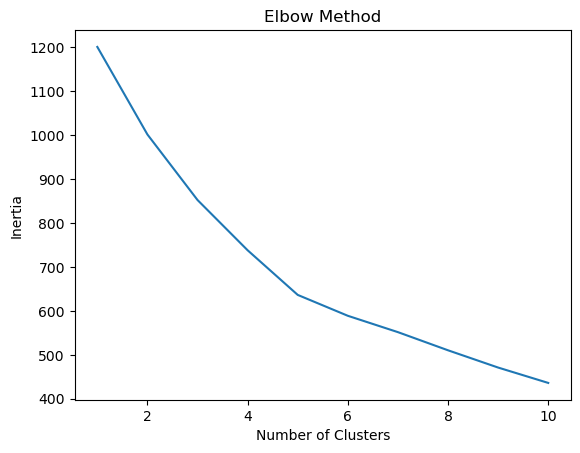

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)
print(df.head())

    latitude  longitude      pm2.5  noise_level  temperature  traffic_density  \
0  18.524908  73.760336  69.394848    55.506011    28.349085       384.697920   
1  18.640143  73.856271  64.142543    91.323821    27.985130        50.000000   
2  18.596399  73.858127  77.859393    69.933179    29.923338       390.751110   
3  18.569732  73.877486  59.295154    66.848361    33.518187       578.360801   
4  18.481204  73.895218  68.927014    56.416422    31.630800       204.217686   

   cluster  
0        1  
1        2  
2        2  
3        0  
4        2  


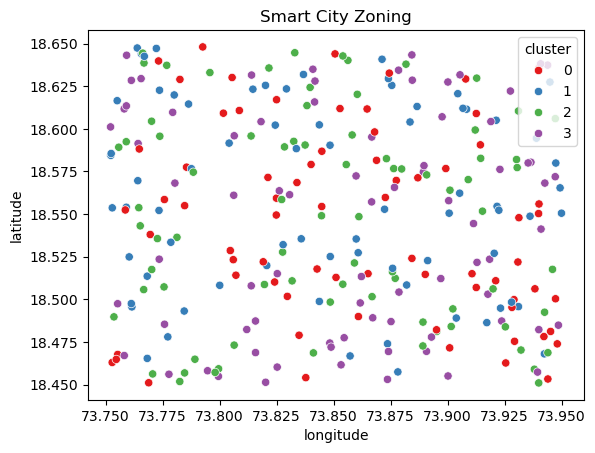

In [11]:
import seaborn as sns

sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df, palette='Set1')
plt.title('Smart City Zoning')
plt.show()

We will now train KNN to predict the zone for new incoming data.

In [16]:
# Train/test split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['cluster'], test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune k
knn.fit(X_train, y_train)

# Accuracy
acc = knn.score(X_test, y_test)
print(f"KNN Accuracy: {acc*100:.2f}%")

KNN Accuracy: 91.67%


Predict New Zone

In [18]:
new_data = np.array([[180, 75, 33, 85]])  # (lat, lon, pm2.5, noise, temp, traffic)
new_data_scaled = scaler.transform(new_data)

predicted_zone = knn.predict(new_data_scaled)
print(f"Predicted Smart City Zone: {predicted_zone[0]}")

Predicted Smart City Zone: 3


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


IoT Data → Preprocess → KMeans Clustering (zones) → Train KNN → Real-Time Predictions